In [22]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



download the dataset and give the path

In [3]:
data = pd.read_csv('/Users/sanyamthakur/Documents/GitHub/Data_Science/datasets/tested.csv')


In [25]:
data.head(100)

,PassengerId,Survived,Pclass,Age,family,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,0,3,34.5,1,0.0,1.0,0.0,0.0,1.0
1,893,1,3,47.0,2,0.0,0.0,1.0,1.0,0.0
2,894,0,2,62.0,1,0.0,1.0,0.0,0.0,1.0
3,895,0,3,27.0,1,0.0,0.0,1.0,0.0,1.0
4,896,1,3,22.0,3,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,987,0,3,25.0,1,0.0,0.0,1.0,0.0,1.0
96,988,1,1,76.0,2,0.0,0.0,1.0,1.0,0.0
97,989,0,3,29.0,1,0.0,0.0,1.0,0.0,1.0
98,990,1,3,20.0,1,0.0,0.0,1.0,1.0,0.0


In [5]:
data.shape


(418, 12)

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: xlabel='Survived', ylabel='count'>

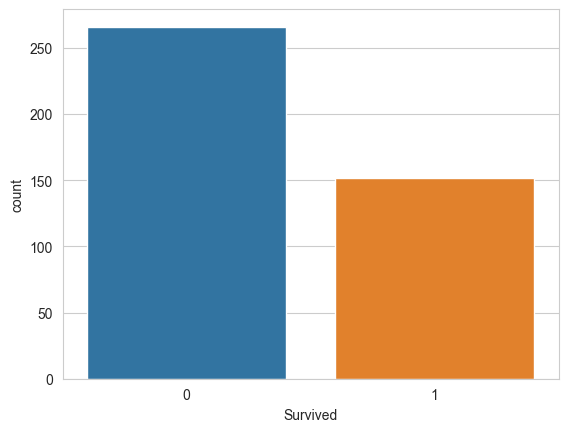

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data)

In [8]:
survivedd=sum(data['Survived']==1)
total=len(data['Survived'])
survived_percentage= survivedd / total
print ('Number of survived people is: ', survivedd)
print('\n')
print ('Survived Percentage is: ',survived_percentage )

Number of survived people is:  152


Survived Percentage is:  0.36363636363636365


<h5>Dropping the unwanted columns. <i>id, Fare, Cabin</i> seems unwanted columns, so let's remove them.</h5>

<Axes: >

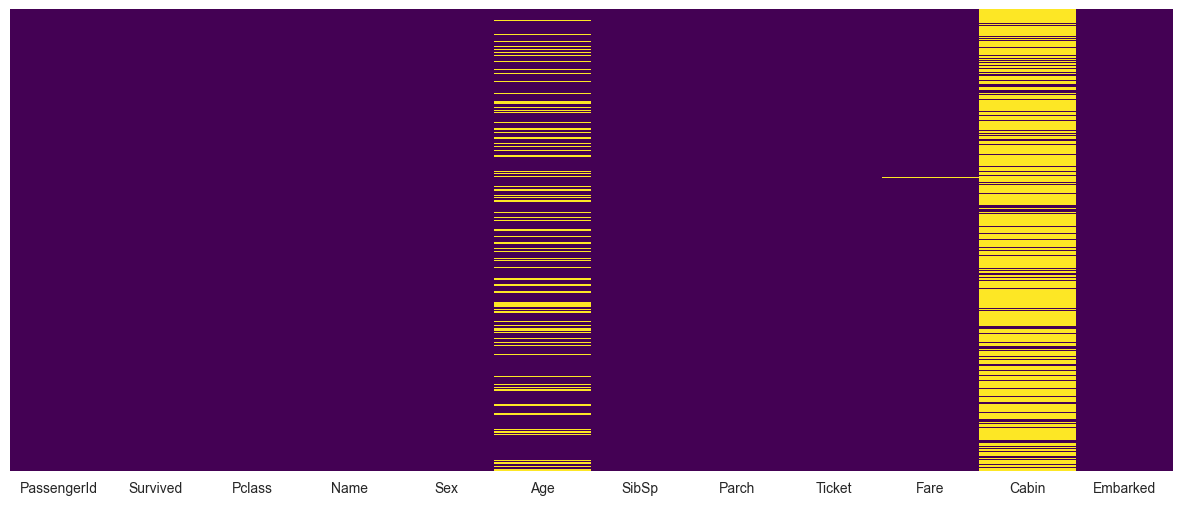

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
data = data.drop(['Name','Fare','Cabin','Ticket'],axis=1)


In [11]:
#c create a new column called 'Family' in the DataFrame 'df'. 
# This column represents the family size of each passenger on the Titanic.
data['family'] = data['Parch']+1+data['SibSp']
data  = data.drop(['Parch','SibSp'],axis=1)

<h3>Pre Processing the data</h3>

In [12]:
#filling the age columns
data['Age'] = data['Age'].fillna(data['Age'].median())

In [13]:
data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [14]:
data['Embarked'] = data['Embarked'].fillna('S')


OneHotEncoding

In [15]:
onehot_encoder = OneHotEncoder(sparse=False)
onehot = onehot_encoder.fit_transform(data[['Embarked','Sex']])
feature_names = onehot_encoder.get_feature_names_out(['Embarked', 'Sex'])
forcont = pd.DataFrame(onehot,columns=feature_names)
data = pd.concat([data.drop(['Embarked','Sex'],axis=1),forcont],axis=1)


In [16]:
data.shape

(418, 10)

In [17]:
X = data.drop(['Survived'],axis=1)
Y = data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [18]:
X_train

,PassengerId,Pclass,Age,family,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
118,1010,1,36.0,1,1.0,0.0,0.0,0.0,1.0
271,1163,3,27.0,1,0.0,1.0,0.0,0.0,1.0
114,1006,1,63.0,2,0.0,0.0,1.0,1.0,0.0
311,1203,3,22.0,1,1.0,0.0,0.0,0.0,1.0
131,1023,1,53.0,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
71,963,3,21.0,1,0.0,0.0,1.0,0.0,1.0
106,998,3,21.0,1,0.0,1.0,0.0,0.0,1.0
270,1162,1,46.0,1,1.0,0.0,0.0,0.0,1.0
348,1240,2,24.0,1,0.0,0.0,1.0,0.0,1.0


In [19]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)
bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=100, random_state=42)

In [20]:
Y_pred = bag.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

1.0

In [23]:
classification_report(Y_pred,Y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        85\n           1       1.00      1.00      1.00        41\n\n    accuracy                           1.00       126\n   macro avg       1.00      1.00      1.00       126\nweighted avg       1.00      1.00      1.00       126\n'